# GEMM

In [37]:
import pandas as pd

In [38]:
data = pd.read_csv("./time_module/profile/A100-SXM-80GB/comp/gemm.csv")

In [40]:
data.sort_values(by=['gpu', 'dtype', 'm', 'k', 'n'], inplace=True)
data

,gpu,dtype,m,k,n,time(us),avg_power(W),avg_energy(uJ)
0,A100-SXM-80GB,half,1,1,1,13,95.925000,1.247025e+03
1,A100-SXM-80GB,half,1,1,2,10,95.780000,9.578000e+02
2,A100-SXM-80GB,half,1,1,3,9,95.520000,8.596800e+02
3,A100-SXM-80GB,half,1,1,4,10,95.925000,9.592500e+02
4,A100-SXM-80GB,half,1,1,5,9,96.290000,8.666100e+02
...,...,...,...,...,...,...,...,...
274604,A100-SXM-80GB,half,32768,32768,65024,556103,496.489182,2.760991e+08
274605,A100-SXM-80GB,half,32768,32768,65152,553829,497.927053,2.757664e+08
274606,A100-SXM-80GB,half,32768,32768,65280,560438,464.085831,2.600913e+08
274607,A100-SXM-80GB,half,32768,32768,65408,552598,497.829894,2.750998e+08


In [41]:
data.to_csv("./time_module/profile/A100-SXM-80GB/comp/gemm.csv", index=False)

In [5]:
data['flops'] = data['m'] * data['k'] * data['n'] * 2
data['mems'] = (data['m'] + data['n']) * data['k'] * 2
data['flops_time'] = data['flops'] / 312 * 10**12 # TFLOP/s
data['mems_time'] = data['mems'] / (2.0 * 10**12) # TB/s
data['est_time'] = data['flops_time'] + data['mems_time']

In [6]:
data

,gpu,dtype,m,k,n,time(us),avg_power(W),avg_energy(uJ),flops,mems,flops_time,mems_time,est_time
0,A100-SXM-80GB,half,1,1,1,13,95.925000,1.247025e+03,2,4,6.410256e+09,2.000000e-12,6.410256e+09
1,A100-SXM-80GB,half,1,1,2,10,95.780000,9.578000e+02,4,6,1.282051e+10,3.000000e-12,1.282051e+10
2,A100-SXM-80GB,half,1,1,3,9,95.520000,8.596800e+02,6,8,1.923077e+10,4.000000e-12,1.923077e+10
3,A100-SXM-80GB,half,1,1,4,10,95.925000,9.592500e+02,8,10,2.564103e+10,5.000000e-12,2.564103e+10
4,A100-SXM-80GB,half,1,1,5,9,96.290000,8.666100e+02,10,12,3.205128e+10,6.000000e-12,3.205128e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274603,A100-SXM-80GB,half,32768,32768,64896,556002,498.085703,2.769366e+08,139363098820608,6400507904,4.466766e+23,3.200254e-03,4.466766e+23
274604,A100-SXM-80GB,half,32768,32768,65024,556103,496.489182,2.760991e+08,139637976727552,6408896512,4.475576e+23,3.204448e-03,4.475576e+23
274605,A100-SXM-80GB,half,32768,32768,65152,553829,497.927053,2.757664e+08,139912854634496,6417285120,4.484386e+23,3.208643e-03,4.484386e+23
274606,A100-SXM-80GB,half,32768,32768,65280,560438,464.085831,2.600913e+08,140187732541440,6425673728,4.493197e+23,3.212837e-03,4.493197e+23


/var/folders/91/m6c9nm0d6x1fdxw_15lf23c40000gn/T/ipykernel_81677/2996858957.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mkn'] = filtered_data['m'] * filtered_data['k'] * filtered_data['n']


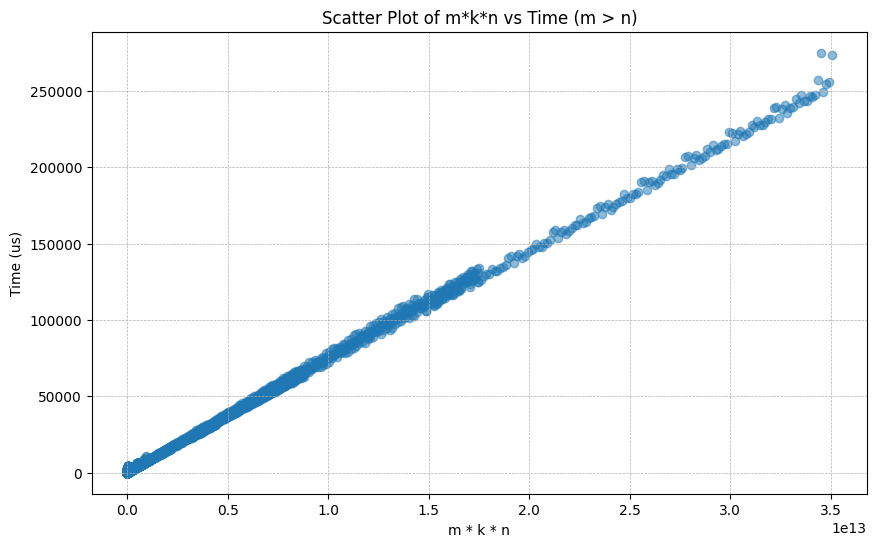

In [43]:
import matplotlib.pyplot as plt

# Filter data where m > n
filtered_data = data[data['m'] > data['n']]

# Calculate m*k*n for filtered data
filtered_data['mkn'] = filtered_data['m'] * filtered_data['k'] * filtered_data['n']

# Plot the scatter chart for filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['mkn'], filtered_data['time(us)'], alpha=0.5)
plt.title('Scatter Plot of m*k*n vs Time (m > n)')
plt.xlabel('m * k * n')
plt.ylabel('Time (us)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


# Attn

In [5]:
import pandas as pd

In [7]:
attn_data = pd.read_csv("./time_module/profile/A100-SXM-80GB/comp/mha.csv")

In [10]:
attn_data['fwd(us)'] = attn_data['fwd'] * 1000
attn_data['bwd(us)'] = attn_data['bwd'] * 1000
attn_data.drop(columns=['fwd', 'bwd'], inplace=True)

In [12]:
# attn_data.sort_values(by=['nhead', 'head_dim', 'tp', 'cp', 'tokens',], inplace=True)
# attn_data = attn_data[['tp', 'cp', 'tokens', 'time(us)', 'nhead', 'head_dim']]
attn_data
attn_data.to_csv("./time_module/profile/A100-SXM-80GB/comp/mha.csv", index=False)


# Time Estimation

In [1]:
import pandas as pd

In [3]:
# mlp: gpu,dtype,m,k,n,time(us),avg_power(W),avg_energy(uJ)
mlp_df = pd.read_csv("./profile/A100-SXM-80GB/comp/gemm.csv")
# all_gather: gpu,num_nodes,num_gpus_per_node,dtype,size(kb),time(us),gpu_freq,energy(J)
all_gather_df = pd.read_csv("./profile/A100-SXM-80GB/comm/all_gather.csv")
# all_reduce: gpu,num_nodes,num_gpus_per_node,dtype,size(kb),time(us),gpu_freq,energy(J)
all_reduce_df = pd.read_csv("./profile/A100-SXM-80GB/comm/all_reduce.csv")
# reduce_scatter: gpu,num_nodes,num_gpus_per_node,dtype,size(kb),time(us),gpu_freq,energy(J)
reduce_scatter_df = pd.read_csv("./profile/A100-SXM-80GB/comm/reduce_scatter.csv")
# attn: gpu,tp,cp,tokens,time(us),nhead,head_dim
attn_data = pd.read_csv("./profile/A100-SXM-80GB/comp/attn.csv")

In [ ]:
def get_mlp_time(m, k, n):
    pass

In [4]:
def symmetric_check(m, k, n):
    a = mlp_df[
        (mlp_df['m'] == m) &
        (mlp_df['k'] == k) &
        (mlp_df['n'] == n)
    ]['time(us)'].values[0]
    b = mlp_df[
        (mlp_df['m'] == n) &
        (mlp_df['k'] == k) &
        (mlp_df['n'] == m)
    ]['time(us)'].values[0]
    return a, b


In [9]:
symmetric_check(1024, 1024, 8192)

(321, 296)

In [10]:
attn_data

,tp,cp,fwd,bwd,head_dim,nhead,tokens
0,1,1,0.89,0.93,128,32,1024
1,1,1,1.14,1.43,128,32,2048
2,1,1,1.54,2.33,128,32,3072
3,1,1,1.92,3.62,128,32,4096
4,1,1,2.76,5.94,128,32,6144
...,...,...,...,...,...,...,...
539,8,8,2.77,3.53,128,64,24576
540,8,8,3.87,4.28,128,64,28672
541,8,8,4.32,5.23,128,64,32768
542,8,8,9.26,16.35,128,64,65536


In [32]:
attn_data2 = attn_data.copy()
# attn_data2['head_dim'] = attn_data2['head_dim'] / attn_data2['tp'] 
attn_data2['nhead'] = attn_data2['nhead'] / attn_data2['tp']
attn_data2['nhead'] = attn_data2['nhead'].astype(int)
attn_data2.drop(columns=['tp'], inplace=True)
columns = list(attn_data2.columns)
columns = ['cp', 'head_dim', 'nhead', 'tokens'] + [col for col in columns if col not in ['cp', 'head_dim', 'nhead', 'tokens']]
attn_data2 = attn_data2[columns]
# deduplicate attn_data2 - only keep the first occurence
attn_data2 = attn_data2.drop_duplicates(subset=['cp', 'head_dim', 'nhead', 'tokens'])
attn_data2.sort_values(by=['cp', 'head_dim', 'nhead', 'tokens'], inplace=True)



In [33]:
attn_data2.to_csv("./profile/A100-SXM-80GB/comp/attn.csv", index=False)

# Time Module Testing

In [1]:
import time_module
import time_module.compute as compute
import time_module.network as network

In [12]:
for tokens in range(1024, 4096+32, 32):
    a = compute.attn_time(
        gpu = "A100-SXM-80GB",
        head_dim = 128,
        nhead = 16,
        tokens = tokens,
        dtype = "half",
        is_fwd=True
    )   
    print(f"{tokens}: {a}")

1024: 1420.0
1056: 1405.3125
1088: 1390.625
1120: 1375.9375
1152: 1361.25
1184: 1346.5625
1216: 1331.875
1248: 1317.1875
1280: 1302.5
1312: 1287.8125
1344: 1273.125
1376: 1258.4375
1408: 1243.75
1440: 1229.0625
1472: 1214.375
1504: 1199.6875
1536: 1185.0
1568: 1170.3125
1600: 1155.625
1632: 1140.9375
1664: 1126.25
1696: 1111.5625
1728: 1096.875
1760: 1082.1875
1792: 1067.5
1824: 1052.8125
1856: 1038.125
1888: 1023.4375
1920: 1008.75
1952: 994.0625
1984: 979.375
2016: 964.6875
2048: 2020.0
2080: 1992.8125
2112: 1965.625
2144: 1938.4375
2176: 1911.25
2208: 1884.0625
2240: 1856.875
2272: 1829.6875
2304: 1802.5
2336: 1775.3125
2368: 1748.125
2400: 1720.9375
2432: 1693.75
2464: 1666.5625
2496: 1639.375
2528: 1612.1875
2560: 1585.0
2592: 1557.8125
2624: 1530.625
2656: 1503.4375
2688: 1476.25
2720: 1449.0625
2752: 1421.875
2784: 1394.6875
2816: 1367.5
2848: 1340.3125
2880: 1313.125
2912: 1285.9375
2944: 1258.75
2976: 1231.5625
3008: 1204.375
3040: 1177.1875
3072: 1400.0
3104: 1400.0
3136: 140

In [3]:
compute.gemm_time(
    gpu = "A100-SXM-80GB",
    m = 1024,
    k = 1024,
    n = 8192,
    dtype = "half",
)   

84